In [38]:
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

In [18]:
n_samples = 1000
n_features = 2
train_rate = 0.8
test_rate = 1-train_rate

In [4]:
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=1, n_redundant=0, n_clusters_per_class=1)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [9]:
# 获取正负样本的X1和X2特征值
pos_X_1 = [X[i, 0] for i in range(n_samples) if y[i]==1]
pos_X_2 = [X[i, 1] for i in range(n_samples) if y[i]==1]

neg_X_1 = [X[i, 0] for i in range(n_samples) if y[i]==0]
neg_X_2 = [X[i, 1] for i in range(n_samples) if y[i]==0]

In [11]:
len(pos_X_1)

501

In [22]:
# 前train_rate为训练样本，后为测试样本
split_index = int(n_samples*train_rate)
train_X = X[:split_index][:]
train_y = y[:split_index]

test_X = X[split_index:][:]
test_y = y[split_index:]

In [28]:
# 感知机模型
clf = Perceptron(fit_intercept=False, n_iter=30, shuffle=False)

In [30]:
clf.fit(train_X, train_y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      n_iter=30, n_jobs=1, penalty=None, random_state=0, shuffle=False,
      verbose=0, warm_start=False)

In [31]:
# 感知机权重矩阵w=[w1,w2,...,wN]
clf.coef_

array([[ 0.4557279 ,  2.30907841]])

In [32]:
# 感知机截距b=[b]
clf.intercept_

array([ 0.])

In [37]:
acc = clf.score(test_X, test_y)
print('acc：', acc)

(u'\u7cbe\u5ea6\uff1a', 0.95499999999999996)


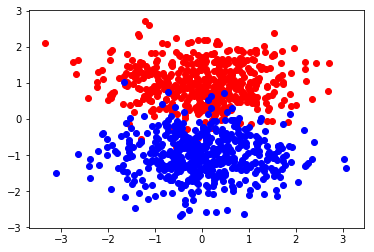

In [17]:
# 绘制正负样本的散点图
plt.scatter(pos_X_1, pos_X_2, c = 'r')
plt.scatter(neg_X_1, neg_X_2, c= 'b')

In [40]:
# 绘制感知机模型分类效果
x1_range = np.arange(-4, 4, 0.01)
# 感知机模型的精度
x2_range = x1_range*clf.coef_[0][0]/clf.coef_[0][1]+clf.intercept_[0]

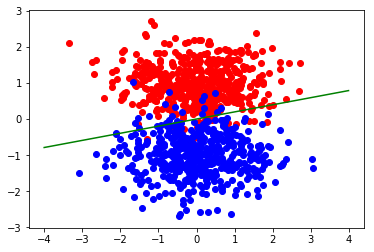

In [42]:
# 绘制正负样本的散点图
plt.scatter(pos_X_1, pos_X_2, c = 'r')
plt.scatter(neg_X_1, neg_X_2, c= 'b')
# 感知机模型分类曲线
plt.plot(x1_range, x2_range, c= 'g')